<a href="https://colab.research.google.com/github/TanmaySafal04/Decisiton_tree_classifier/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the
Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger
survived or
not.
Loading Data and modules

import numpy as np

import pandas as pd

import seaborn as sb

import matplotlib.pyplot as plt

import sklearn

from pandas import Series, DataFrame

from pylab import rcParams

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split

from sklearn import metrics

from sklearn.metrics import classification_report

Url = https://raw.githubusercontent.com/BigDataGal/Python-for-
Data-
Science/master/titanic-train.csv

titanic = pd.read_csv(url)

titanic.columns =
[&#39;PassengerId&#39;,&#39;Survived&#39;,&#39;Pclass&#39;,&#39;Name&#39;,&#39;Sex&#39;,&#39;Age&#39;,&#39;SibSp&#39;,&#39;Parch&#39;,&#39;
Ti
cket&#39;,&#39;Fare&#39;,&#39;Cabin&#39;,&#39;E mbarked&#39;]
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger

survived.

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

In [161]:
url ="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [162]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [163]:
titanic.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],inplace=True)

In [164]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [165]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [166]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [167]:
mean_age=titanic['Age'].mean().round()

In [168]:
titanic[titanic['Sex']=='male']['Age'].mean()

30.72664459161148

In [169]:
titanic[titanic['Sex']=='female']['Age'].mean()

27.915708812260537

In [170]:
mean_age=titanic['Age'].mean().round()

In [171]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

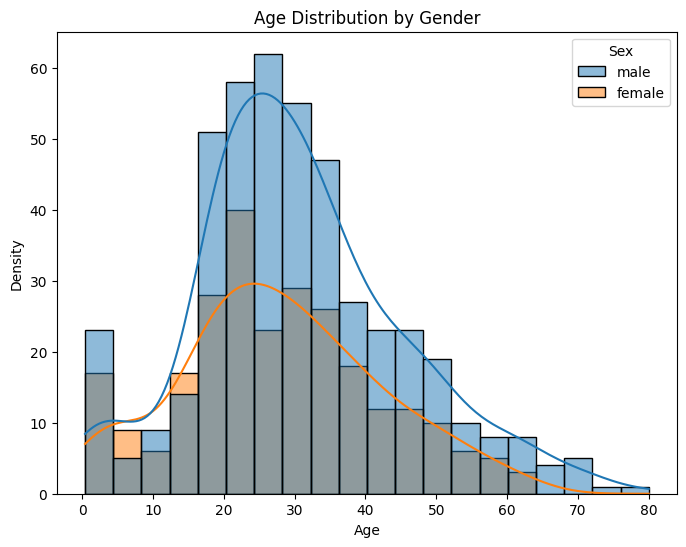

In [172]:
plt.figure(figsize=(8, 6))

# Plot distribution plot
sns.histplot(data=titanic, x='Age', hue='Sex', kde=True)

# Adding labels and title
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')

# Show plot
plt.show()

In [173]:
titanic['Age'].fillna(mean_age,inplace=True)

In [174]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [175]:
gender=[]
for i in range(len(titanic['Sex'])):
  if titanic.iloc[i]['Sex'] =='male':
    gender.append(1)
  else:
    gender.append(0)


In [176]:
titanic['Gender']=gender

In [177]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Gender
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,1,0,0
2,1,3,female,26.0,0,0,0
3,1,1,female,35.0,1,0,0
4,0,3,male,35.0,0,0,1


In [178]:
titanic.drop(columns=['Sex'],inplace=True)

In [179]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Gender
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [180]:
x=titanic.drop(columns=['Survived'])
y=titanic['Survived']

In [181]:
x

,Pclass,Age,SibSp,Parch,Gender
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1
...,...,...,...,...,...
886,2,27.0,0,0,1
887,1,19.0,0,0,0
888,3,30.0,1,2,0
889,1,26.0,0,0,1


In [182]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [183]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.75,random_state=42)

In [184]:
x_train

,Pclass,Age,SibSp,Parch,Gender
709,3,30.0,1,1,1
439,2,31.0,0,0,1
840,3,20.0,0,0,1
720,2,6.0,0,1,0
39,3,14.0,1,0,0
...,...,...,...,...,...
810,3,26.0,0,0,1
219,2,30.0,0,0,1
641,1,24.0,0,0,0
812,2,35.0,0,0,1


In [185]:
y_train

709    1
439    0
840    0
720    1
39     1
      ..
810    0
219    0
641    1
812    0
672    0
Name: Survived, Length: 669, dtype: int64

In [186]:
x_test

,Pclass,Age,SibSp,Parch,Gender
815,1,30.0,0,0,1
624,3,21.0,0,0,1
855,3,18.0,0,1,0
680,3,30.0,0,0,0
386,3,1.0,5,2,1
...,...,...,...,...,...
106,3,21.0,0,0,0
270,1,30.0,0,0,1
860,3,41.0,2,0,1
435,1,14.0,1,2,0


In [187]:
y_test

815    0
624    0
855    1
680    0
386    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 222, dtype: int64

In [188]:
classifier=DecisionTreeClassifier()

In [189]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [190]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [191]:
# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7927927927927928
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       140
           1       0.72      0.71      0.72        82

    accuracy                           0.79       222
   macro avg       0.78      0.78      0.78       222
weighted avg       0.79      0.79      0.79       222

Confusion Matrix:
[[118  22]
 [ 24  58]]


In [193]:
accuracy = accuracy_score(y_test, y_pred)
print("Test_Accuracy:", accuracy)

print()

pred_train = classifier.predict(x_train)
accuracy = accuracy_score(y_train, pred_train)
print("Trainining_Accuracy:", accuracy)

Test_Accuracy: 0.7927927927927928

Trainining_Accuracy: 0.929745889387145


In [198]:
path=classifier.cost_complexity_pruning_path(x_train,y_train)

In [199]:
path_dataframe=pd.DataFrame(path)

In [200]:
path_dataframe

,ccp_alphas,impurities
0,0.000000e+00,0.098275
1,-8.673617e-19,0.098275
2,3.558972e-06,0.098279
3,3.122065e-05,0.098310
4,4.982561e-05,0.098360
...,...,...
66,8.060025e-03,0.275895
67,1.252961e-02,0.288425
68,1.387145e-02,0.302297
69,3.823669e-02,0.340533


In [204]:
param_grid = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5],  # Adjust values as needed
    'max_depth': [None, 5, 10, 15],  # Adjust values as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with best parameters on the test data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.8018018018018018


In [205]:
accuracy = accuracy_score(y_test, y_pred)
print("Test_Accuracy:", accuracy)

print()

pred_train = best_clf.predict(x_train)
accuracy = accuracy_score(y_train, pred_train)
print("Trainining_Accuracy:", accuracy)

Test_Accuracy: 0.8018018018018018

Trainining_Accuracy: 0.8624813153961136
